In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

import seaborn as sns
import datetime
import h5py

import numpy as np
import pandas as pd
from sklearn import pipeline

# load dataset
which is available in the release on the repo.

In [2]:
datafolder = './dataset/'

In [3]:
df = pd.read_csv(datafolder+'dataset.pd', index_col=0)

In [4]:
df

finger surface    class                          filename
0   index      S3    touch  antoine_2017-03-08_10:48:36.hdf5
1   index      S3  notouch  antoine_2017-03-08_10:50:27.hdf5
2   thumb      S3    touch  antoine_2017-03-08_10:52:53.hdf5
3   thumb      S3  notouch  antoine_2017-03-08_10:54:12.hdf5
4   pinky      S3    touch  antoine_2017-03-08_10:55:51.hdf5
5   pinky      S3  notouch  antoine_2017-03-08_10:56:57.hdf5
6   index      S4    touch  antoine_2017-03-08_11:01:13.hdf5
7   index      S4  notouch  antoine_2017-03-08_11:02:24.hdf5
8   thumb      S4    touch  antoine_2017-03-08_11:03:39.hdf5
9   thumb      S4  notouch  antoine_2017-03-08_11:04:52.hdf5
10  pinky      S4    touch  antoine_2017-03-08_11:09:15.hdf5
11  pinky      S4  notouch  antoine_2017-03-08_11:10:23.hdf5

In [5]:
df = df[:6]
#dont have the rest of the data

In [6]:
df[:1]['filename'][0]

'antoine_2017-03-08_10:48:36.hdf5'

# Extract the features

In [7]:
import ml

In [8]:
pip = pipeline.Pipeline([
    ('step1', ml.Step1()),
    ('voxelgridfilter', ml.VoxelGridFilter(leaf_size=0.002)),
    ('roiextractor', ml.RoiExtractor()),
    ('fingerPlaneExtractor', ml.FingerPlaneExtractor()),
    ('featureextractor', ml.FeatureExtractor()),
])

class Dataset(object):
    def __init__(self, X, org, mat, ext):
        self.X = X
        self.org = org
        self.mat = mat
        self.ext = ext

In [9]:
def extract_feature(args):
    i, row = args

    ## X
    filename = row['filename']    
    hdf5file = h5py.File(datafolder+filename, 'r')

    x = hdf5file['data/depth']
    org = np.array(hdf5file['origin'], dtype=np.float32)
    mat = np.array(hdf5file['matrix'], dtype=np.float32)
    ext = np.array(hdf5file['extrema'], dtype=np.float32)
    
    t1 = datetime.datetime.now()
    data = pip.transform([Dataset(x, org, mat, ext)])

    print("classification {} for {} frames".format(datetime.datetime.now() - t1, x.shape[0]))
    return data[:,:-3]

In [16]:
def show(args):
    row = args
    
    ## X
    filename = row['filename']    
    hdf5file = h5py.File(datafolder+filename, 'r')

    x = hdf5file['data/depth']
    org = np.array(hdf5file['origin'], dtype=np.float32)
    mat = np.array(hdf5file['matrix'], dtype=np.float32)
    ext = np.array(hdf5file['extrema'], dtype=np.float32)
    
    t1 = datetime.datetime.now()
    print(x)
    print(org)
    print(mat)
    print(ext)

In [17]:
for i,s in df[:1].iterrows():
    show(s)

<HDF5 dataset "depth": shape (900, 480, 640), type "<i2">
[-0.02447118  0.04334398  0.48819783]
[[-0.99605614 -0.01738526 -0.08700524]
 [ 0.03583719  0.6219017  -0.78227484]
 [ 0.06540816 -0.7855196  -0.6153704 ]]
[-0.1993  0.1993 -0.157   0.147 ]


In [41]:
from multiprocessing import Pool

pool = Pool(processes=2)
Xc = pool.map(extract_feature, df.iterrows())

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


classification 0:01:02.791046 for 900 frames
classification 0:01:06.057026 for 900 frames


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


classification 0:00:56.780337 for 900 frames
classification 0:01:02.523383 for 900 frames
classification 0:00:57.771541 for 900 frames
classification 0:01:02.448485 for 900 frames


# compare with features.npy

In [42]:
Xc = np.array(Xc)

In [43]:
Xc.shape

(6, 900, 20)

In [44]:
Xc_ = np.load('./features.npy')

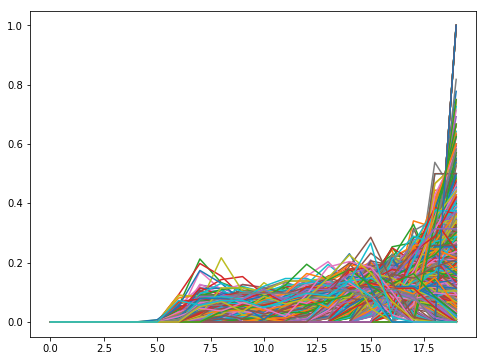

In [45]:
_=plt.plot(Xc[1].T)

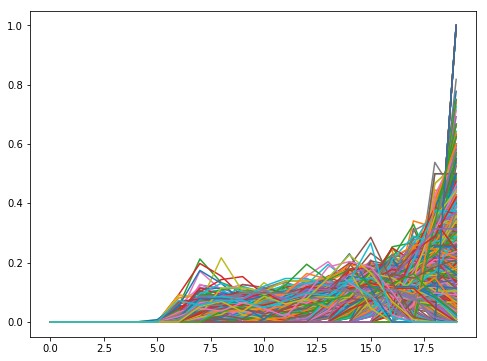

In [46]:
_=plt.plot(Xc_[1].T)

In [15]:
np.count_nonzero(np.isclose(Xc, Xc_)) / np.prod(Xc.shape)

0.9987314814814815